# <font color=darkred>Laboratory 23: Regression Models (Inference) </font>

In [ ]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

## Full name: 
## R#: 
## Title of the notebook
## Date: 

## Example: Advertising and Sells! <br>
This is a classic regression problem. we have a dataset of the spendings on TV, Radio, and Newspaper advertisements and number of sales for a specific product. We are interested in exploring the relationship between these parameters and answering the following questions:
- Can TV advertising spending predict the number of sales for the product?
- Can Radio advertising spending predict the number of sales for the product?
- Can Newspaper advertising spending predict the number of sales for the product?
- Can we use the three of them to predict the number of sales for the product? | Multiple Linear Regression Model
- Which parameter is a better predictor of the number of sales for the product?

In [ ]:
import requests # Module to process http/https requests
remote_url="http://54.243.252.9/engr-1330-webroot/4-Databases/Advertising.csv"  # set the url
rget = requests.get(remote_url, allow_redirects=True)  # get the remote resource, follow imbedded links
open('Advertising.csv','wb').write(rget.content); # extract from the remote the contents, assign to a local file same name

In [42]:
# Import and display first rows of the advertising dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [2]:
df.shape

(200, 4)

In [3]:
# Describe the df
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Get Correlation Coefficient - What can we infer?
#### Variables that have strong, average or weak positive or negative correlations
#### Multicollinearity: when two or more independent variables are moderately of highely correlated with one another. 


In [4]:
# Get Correlation Coefficient - What can we infer?
df.corr(method ='pearson') 

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


C:\Users\Nengi Amao\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nengi Amao\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nengi Amao\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nengi Amao\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

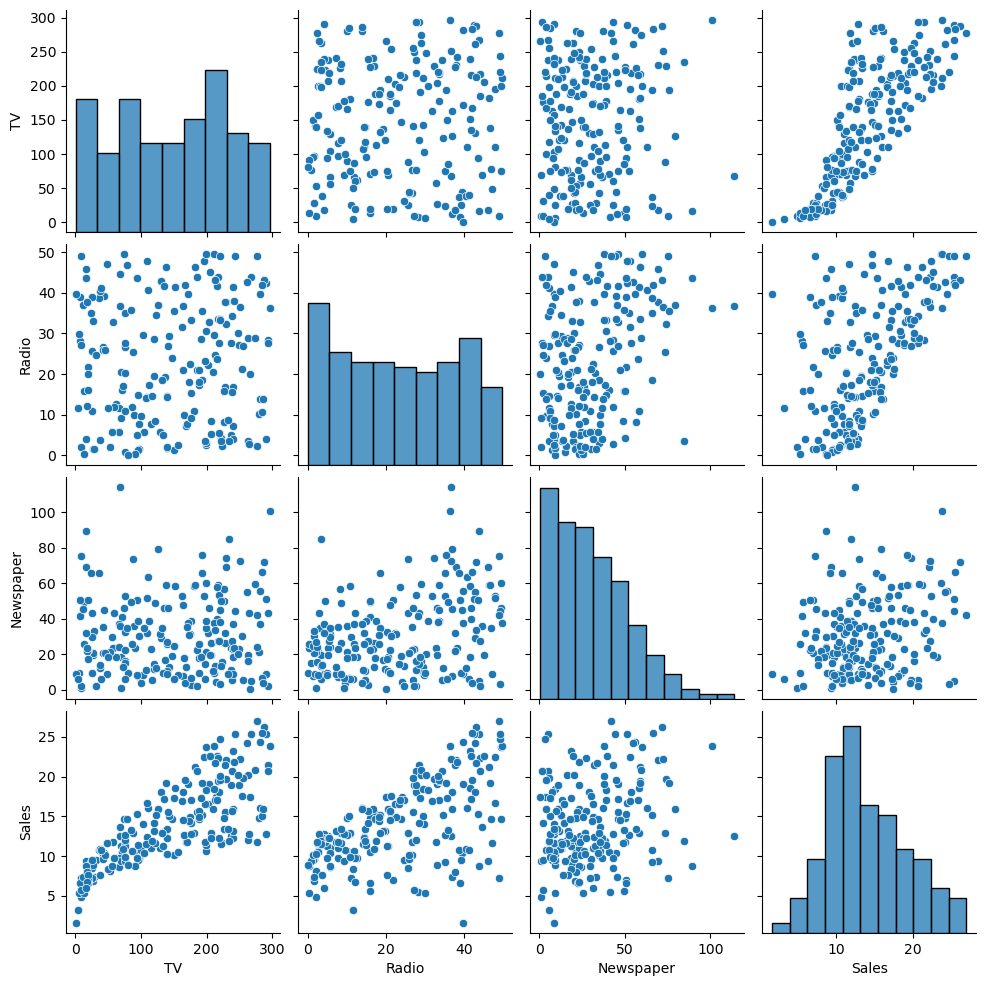

In [43]:
import seaborn as sns
sns.pairplot(df)

#### The effect of each variable cannot be correctly computed. Any vif of 5 and above is a candidate for multicollinearity

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

x_var = df[["TV","Radio","Newspaper"]]

vif_data = pd.DataFrame(data = x_var.columns,columns=["feature"]) 
vif_data["VIF"] = [vif(x_var.values, i) for i in range(len(x_var.columns))]

vif_data

,feature,VIF
0,TV,2.486772
1,Radio,3.285462
2,Newspaper,3.055245


## Inference

**Specify the model. Every model has some level of misspecification, how do we reduce the misspecification so that it is a good fit for the data**

Steps for building an inferential model

    Specify the models of interest.
    Check that model assumptions hold. We will do a visual check to confirm that errors are,
        linear, , Residual vs Fit plot
        normally distributed, Histogram
        have constant variance (homogeneity), Residual vs Fit plot
        are independent of each other: Residual vs Order plot
    Choose the model with the least AIC or BIC


In [6]:
# Answer the first question: Can TV advertising spending predict the number of sales for the product?
import statsmodels.formula.api as smf

# Initialise and fit linear regression model using `statsmodels`
lm = smf.ols('Sales ~ TV', data=df)
model = lm.fit()
print(model.params)

Intercept    7.032594
TV           0.047537
dtype: float64


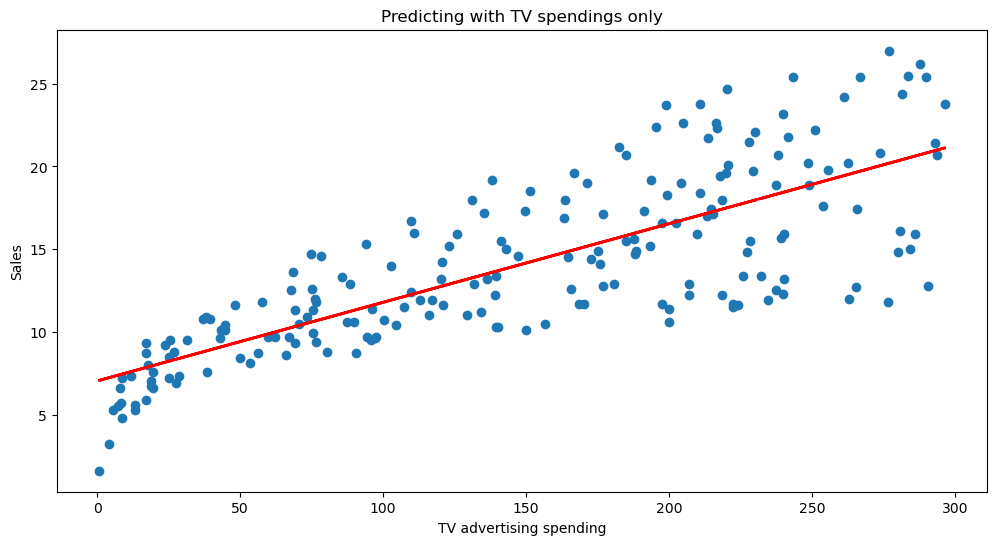

In [7]:
# Predict values
TV_pred = model.predict()

#get the residuals for test
TV_pred = model.predict()
residual = df["Sales"] - TV_pred

# Plot regression against actual data - What do we see?
plt.figure(figsize=(12, 6))
plt.plot(df['TV'], df['Sales'], 'o')           # scatter plot showing actual data
plt.plot(df['TV'], TV_pred, 'r', linewidth=2)   # regression line
plt.xlabel('TV advertising spending')
plt.ylabel('Sales')
plt.title('Predicting with TV spendings only')

plt.show()

### Check for Independence

Text(0.5, 1.0, 'Residual vs Order Plot')

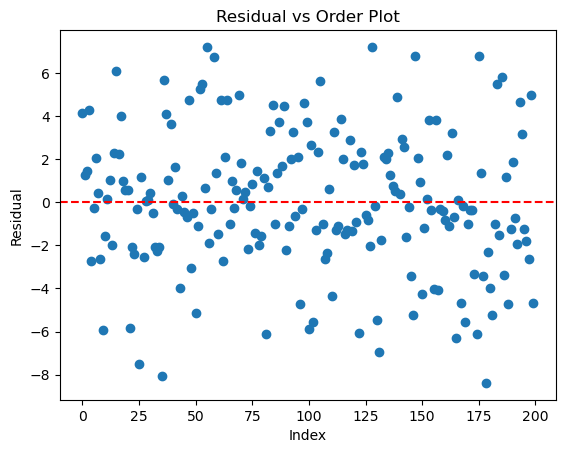

In [8]:
#Residual vs Order plot
plt.scatter(df.index,residual)
plt.axhline(y = 0, color ='r', linestyle="--")
plt.xlabel("Index")
plt.ylabel("Residual")
plt.title('Residual vs Order Plot')

#### Assumption of independence is met, there is no auto correlation, observatations are independent. Violating this could lead to inefficient estimators

### Check for Heteroskedacity (Non-Consntant Variance)

Text(0.5, 1.0, 'Residual vs Fit Plot')

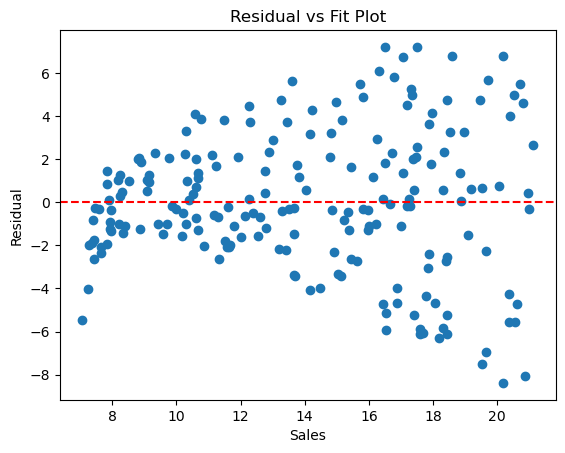

In [9]:
#Residual vs Fit plot
TV_pred = model.predict()
residual = df["Sales"] - TV_pred

plt.scatter(TV_pred,residual)
plt.axhline(y = 0, color ='r', linestyle="--")
plt.xlabel("Sales")
plt.ylabel("Residual")
plt.title('Residual vs Fit Plot')

#### Result of the plot shows heteroskedacity, meeaning it does not have constant variance, this means that variance of sales, based on TV ads is not constant. For example taking out TV ads on different TV shows could have different effect on sales. This can lead to underestimated standard errors which consequently could lead to incorrect p-values and inferences

#### Histogram

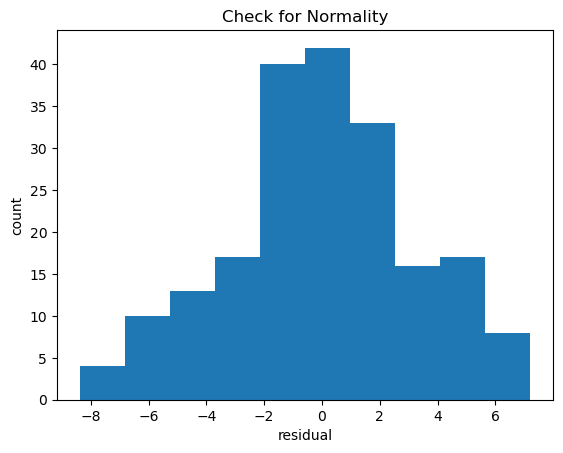

In [10]:
plt.hist(residual)
plt.xlabel("residual")
plt.ylabel("count")
plt.title("Check for Normality");

#### QQplot

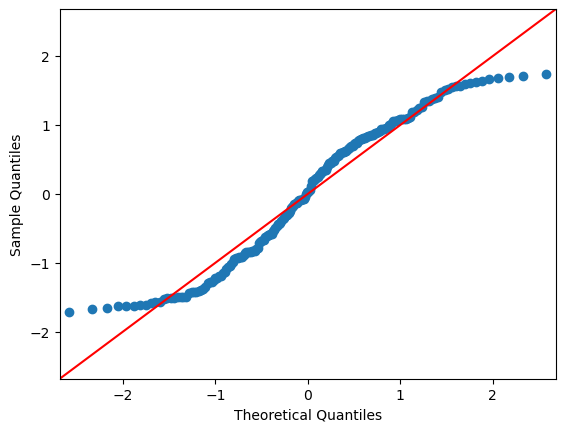

In [11]:
### Check for Normality
import statsmodels.api as sm
import scipy.stats as stats
fig = sm.qqplot(TV_pred, stats.t, fit=True, line="45")
plt.show()

### Check Residual vs Predictor (Radio)

Text(0.5, 1.0, 'Residual vs Predictor Plot')

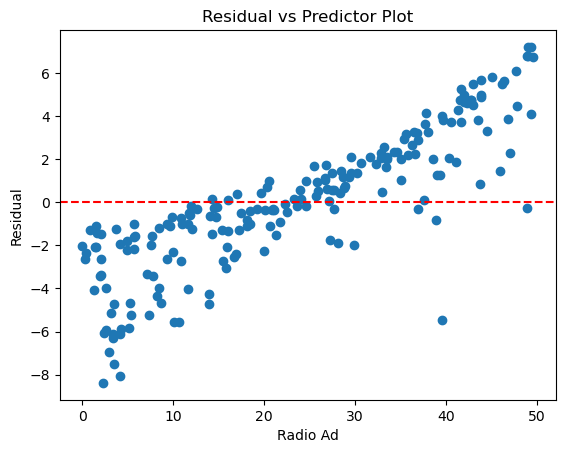

In [12]:
#Residual vs Predictor plot

plt.scatter(df["Radio"],residual)
plt.axhline(y = 0, color ='r', linestyle="--")
plt.xlabel("Radio Ad")
plt.ylabel("Residual")
plt.title('Residual vs Predictor Plot')

Use residuals to determine if adding more variables. In this case Radio spend appears to have a linear relationship with the residuals meaning some of the varition in number sales can be captured

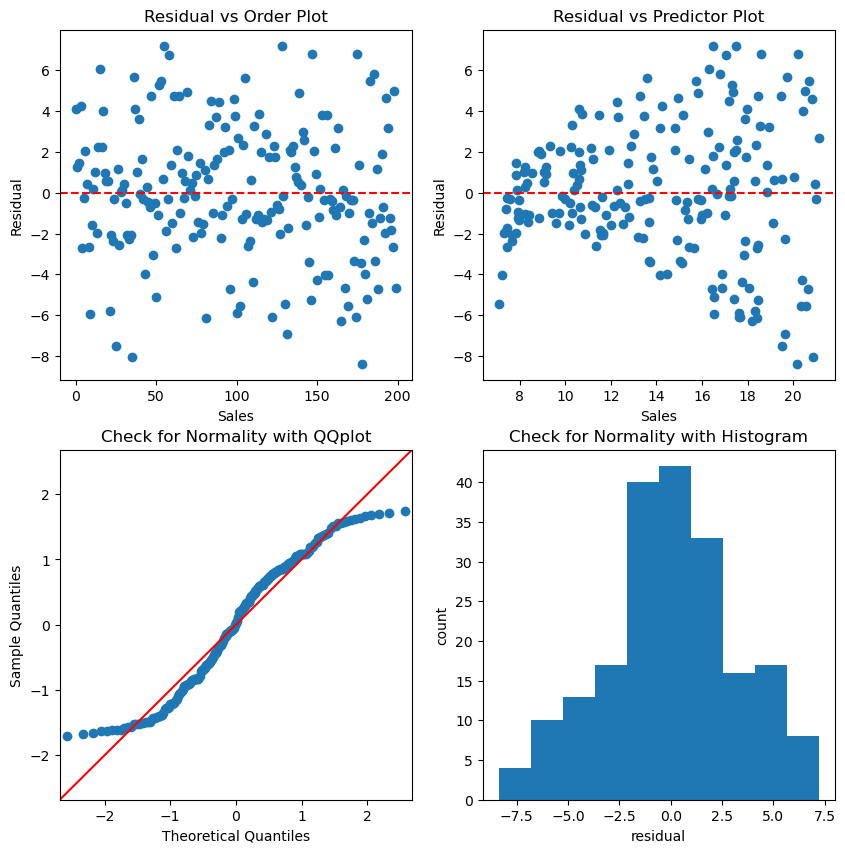

In [13]:
from make_diagnostic_plots import residual_plot
residual_plot(df["Sales"],TV_pred)

### Model with all the Polynomial and Interaction Effects between All Media Channels

In [14]:
#Polynomial
df["TV_sq"] = df["TV"] ** 2
df["Radio_sq"] = df["Radio"] ** 2
df["Newspaper_sq"] = df["Newspaper"] ** 2

#Interaction effects
df["TV_Radio"] = df["TV"] * df["Radio"]
df["Radio_Newspaper"] = df["Radio"] * df["Newspaper"]
df["Newspaper_TV"] = df["Newspaper"] * df["TV"]

#Interaction of all media for test
df["TV_Radio_Newspaper"] = df["TV"] * df["Radio"] * df["Newspaper"]

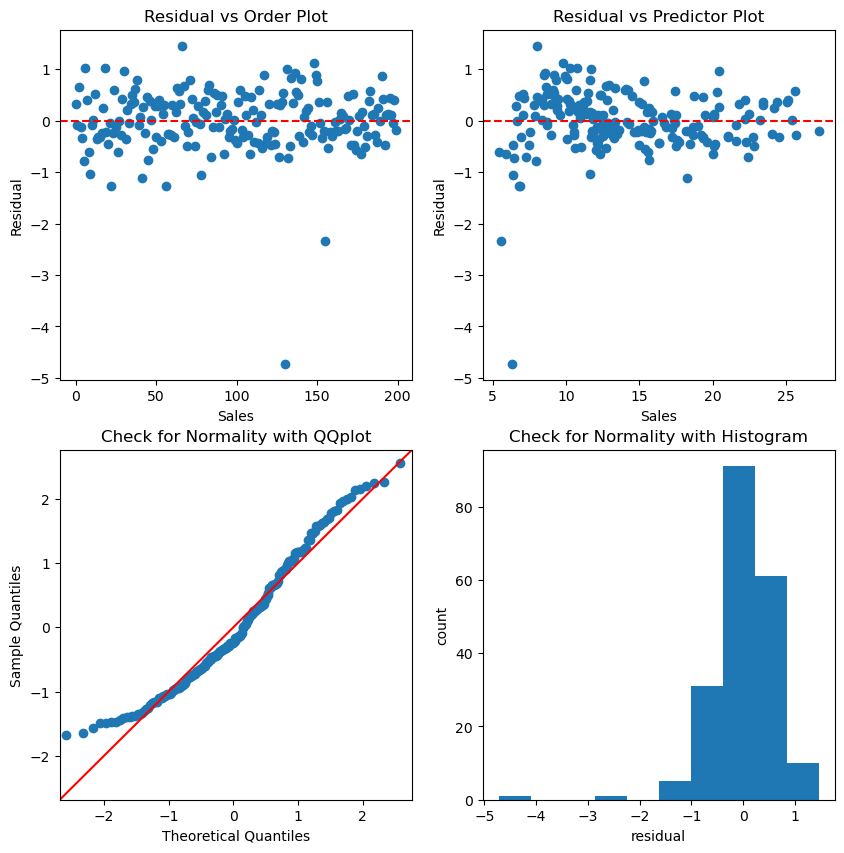

In [15]:
lm = smf.ols('Sales ~ TV + TV_sq + Radio + Radio_sq + Newspaper + Newspaper_sq + TV_Radio + Radio_Newspaper + Newspaper_TV + TV_Radio_Newspaper', data=df)
model_2 = lm.fit()

#get the residuals for test
sales_pred = model_2.predict()
residual_plot(df["Sales"], sales_pred)

#### Treat the outliers

The fit of the model is affected by the outliers. We will find these outliers and determine how to deal with them

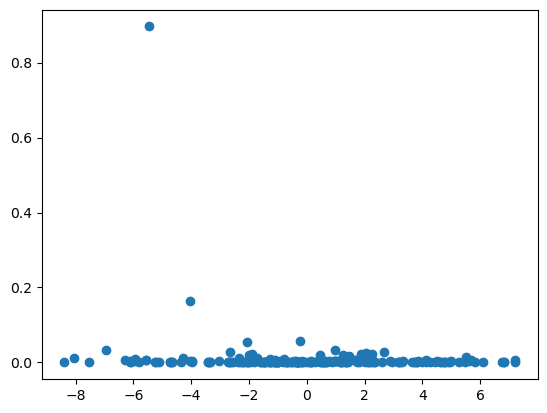

In [16]:
# (4/n) 
influence = model_2.get_influence()
cooks = influence.cooks_distance


plt.scatter(residual,cooks[0])

In [17]:
np.where(cooks[0] >= 0.1)

(array([130, 155], dtype=int64),)

In [18]:
df.loc[(130,155),:]

,TV,Radio,Newspaper,Sales,TV_sq,Radio_sq,Newspaper_sq,TV_Radio,Radio_Newspaper,Newspaper_TV,TV_Radio_Newspaper
130,0.7,39.6,8.7,1.6,0.49,1568.16,75.69,27.72,344.52,6.09,241.164
155,4.1,11.6,5.7,3.2,16.81,134.56,32.49,47.56,66.12,23.37,271.092


Apparently in these cases, more money was spent on Radio and Newspaper ads and less on TV ads, could it be that this was why there was less sales

In [19]:
df.describe()

,TV,Radio,Newspaper,Sales,TV_sq,Radio_sq,Newspaper_sq,TV_Radio,Radio_Newspaper,Newspaper_TV,TV_Radio_Newspaper
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.00000,200.000000,2.000000e+02
mean,147.042500,23.264000,30.554000,14.022500,28955.591950,760.539300,1405.48370,3490.309900,824.73275,4598.126400,1.249737e+05
std,85.854236,14.846809,21.778621,5.217457,25565.429396,735.807704,1863.38301,3360.740127,937.81978,4870.716495,1.841252e+05
min,0.700000,0.000000,0.300000,1.600000,0.490000,0.000000,0.09000,0.000000,0.00000,6.090000,0.000000e+00
25%,74.375000,9.975000,12.750000,10.375000,5531.957500,99.502500,162.57000,773.445000,147.93750,1119.747500,1.461359e+04
50%,149.750000,22.900000,25.750000,12.900000,22425.065000,524.570000,663.08500,2069.065000,416.11500,2809.675000,4.500682e+04
75%,218.825000,36.525000,45.100000,17.400000,47884.697500,1334.077500,2034.01000,5516.197500,1243.19000,6492.930000,1.621647e+05
max,296.400000,49.600000,114.000000,27.000000,87852.960000,2460.160000,12996.00000,13540.410000,4172.40000,29906.760000,1.085615e+06


In [20]:
df[df["Sales"] > 17].head()

,TV,Radio,Newspaper,Sales,TV_sq,Radio_sq,Newspaper_sq,TV_Radio,Radio_Newspaper,Newspaper_TV,TV_Radio_Newspaper
0,230.1,37.8,69.2,22.1,52946.01,1428.84,4788.64,8697.78,2615.76,15922.92,601886.376
3,151.5,41.3,58.5,18.5,22952.25,1705.69,3422.25,6256.95,2416.05,8862.75,366031.575
11,214.7,24.0,4.0,17.4,46096.09,576.00,16.00,5152.80,96.00,858.80,20611.200
14,204.1,32.9,46.0,19.0,41656.81,1082.41,2116.00,6714.89,1513.40,9388.60,308884.940
15,195.4,47.7,52.9,22.4,38181.16,2275.29,2798.41,9320.58,2523.33,10336.66,493058.682


In [21]:
df[df["Sales"] < 5]

,TV,Radio,Newspaper,Sales,TV_sq,Radio_sq,Newspaper_sq,TV_Radio,Radio_Newspaper,Newspaper_TV,TV_Radio_Newspaper
8,8.6,2.1,1.0,4.8,73.96,4.41,1.00,18.06,2.10,8.60,18.060
130,0.7,39.6,8.7,1.6,0.49,1568.16,75.69,27.72,344.52,6.09,241.164
155,4.1,11.6,5.7,3.2,16.81,134.56,32.49,47.56,66.12,23.37,271.092


#### I can go ahead to test this assumption by creating a categorical variable, to capture wether TV ad spend was more than radio and newspaper spend and then refit my second model

In [22]:
tv_greater_than 1, 0
tv_less_than

SyntaxError: invalid syntax (1211182980.py, line 1)

In [23]:
df["TV_Greater"] = np.where(((df["TV"] > df["Radio"]) | (df["TV"] > df["Newspaper"])), 1, 0)
df[["TV","Radio","Newspaper","TV_Greater"]].head()

,TV,Radio,Newspaper,TV_Greater
0,230.1,37.8,69.2,1
1,44.5,39.3,45.1,1
2,17.2,45.9,69.3,0
3,151.5,41.3,58.5,1
4,180.8,10.8,58.4,1


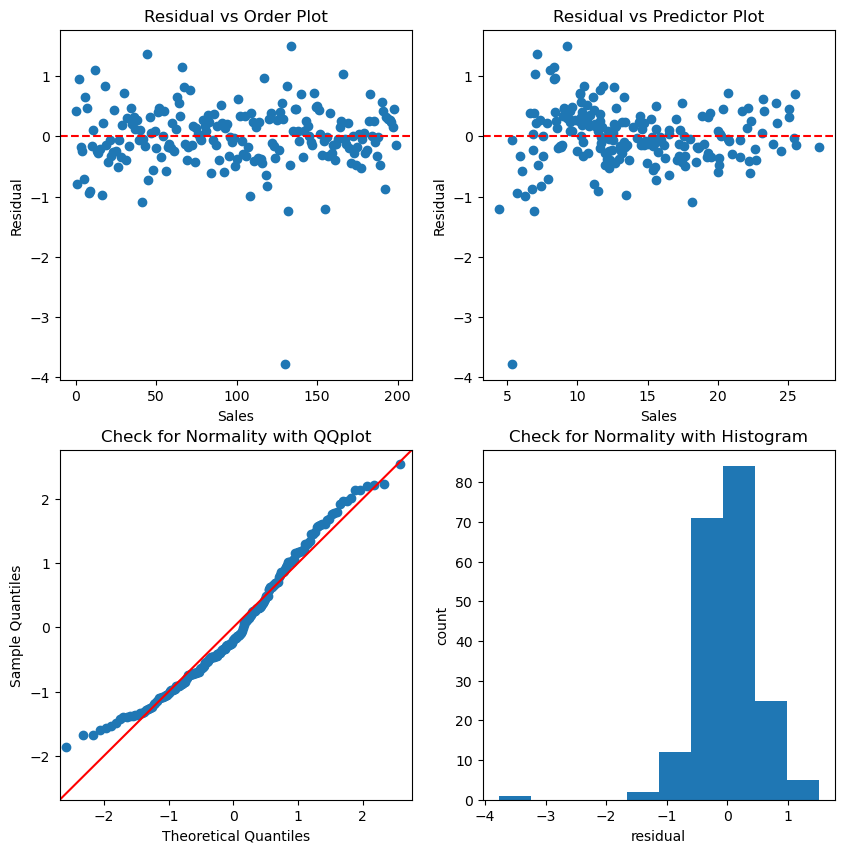

In [24]:
#Fit model_3
lm = smf.ols('Sales ~ TV + TV_sq + Radio + Radio_sq + Newspaper + Newspaper_sq + TV_Radio + Radio_Newspaper + Newspaper_TV + TV_Radio_Newspaper + TV_Greater', data=df)
model_3 = lm.fit()

#get the residuals for test
sales_pred = model_3.predict()
residual_plot(df["Sales"], sales_pred)

### Compare AIC

In [25]:
print(f"model: {model.aic}")

model: 1042.0913275363478


In [26]:
print(f"model_2: {model_2.aic} \n model_3: {model_3.aic}")

model_2: 387.2198949359983 
 model_3: 336.41374366567993


#### Choose smaller AIC and now check summary

In [27]:
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     1641.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):          2.73e-180
Time:                        09:09:11   Log-Likelihood:                -156.21
No. Observations:                 200   AIC:                             336.4
Df Residuals:                     188   BIC:                             376.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.6104      0

347.0166424335222


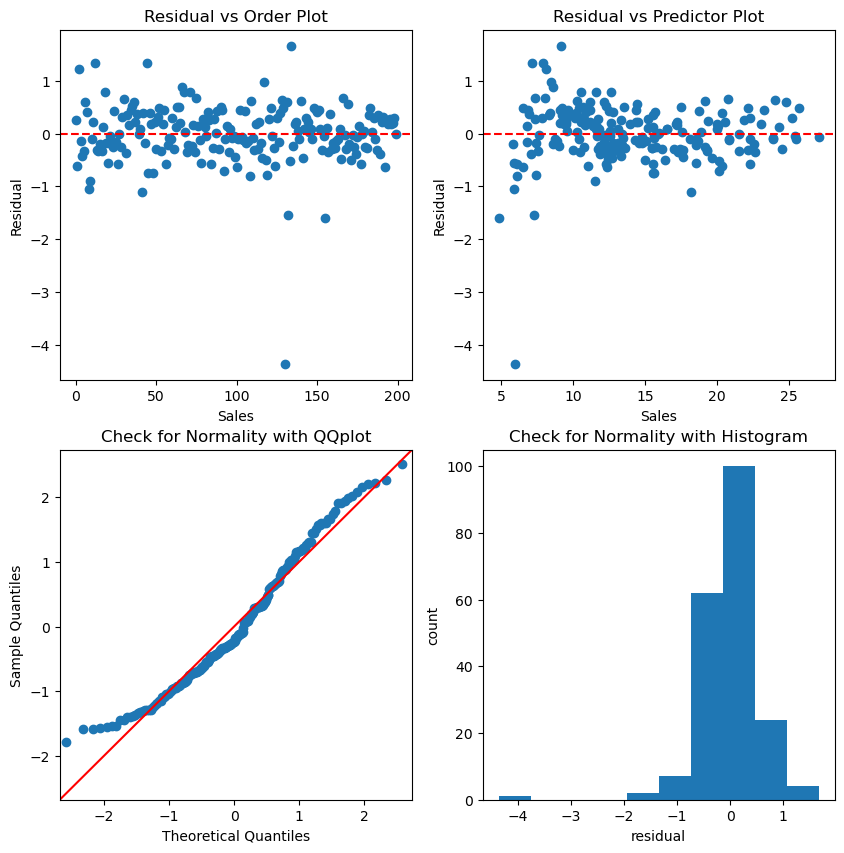

In [28]:
### Refit model with only significant variables and check AIC
#Fit model_4
lm = smf.ols('Sales ~ TV + TV_sq + Radio + Newspaper + TV_Radio + TV_Greater', data=df)
model_4 = lm.fit()

#get the residuals for test
print(model_4.aic)
sales_pred = model_4.predict()
residual_plot(df["Sales"], sales_pred)

329.68491652774827


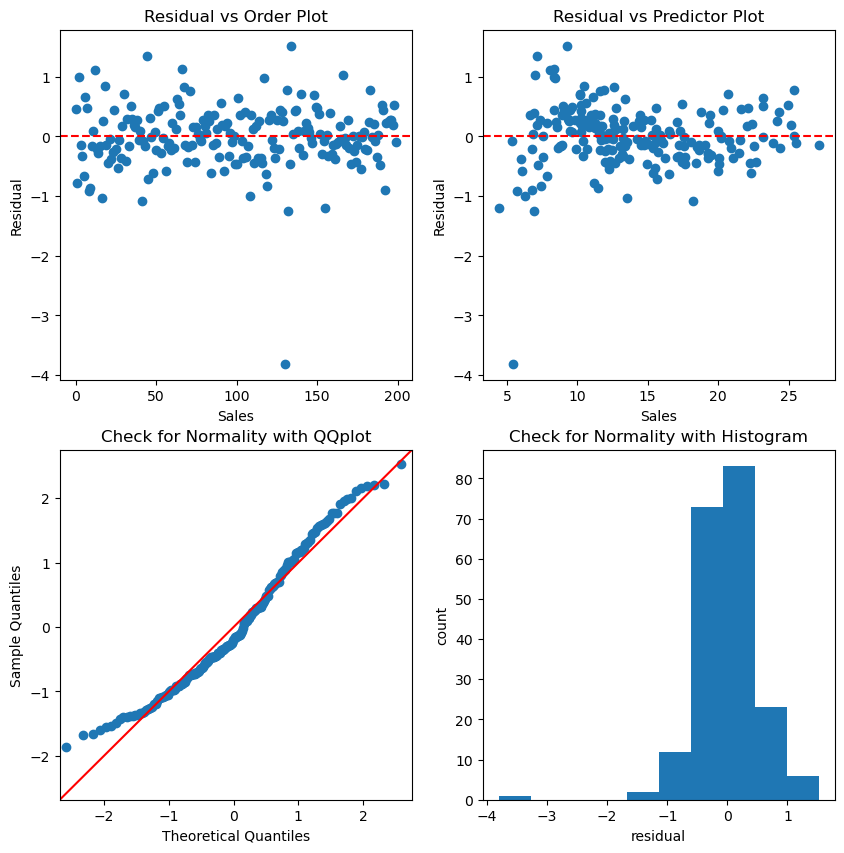

In [29]:
### Refit model with only significant variables and check AIC
#Fit model_4
lm = smf.ols('Sales ~ TV + TV_sq + Radio + Newspaper + TV_Radio + Newspaper_TV + TV_Greater', data=df)
model_5 = lm.fit()

#get the residuals for test
print(model_5.aic)
sales_pred = model_5.predict()
residual_plot(df["Sales"], sales_pred)

In [30]:
print(model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     2617.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):          9.40e-187
Time:                        09:09:45   Log-Likelihood:                -156.84
No. Observations:                 200   AIC:                             329.7
Df Residuals:                     192   BIC:                             356.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.5915      0.252     14.234   

In [39]:
(model_5.mse_total)**0.5

5.217456565710478

### Interprete Coefficients

**all the betas except for except for tv_gtr which is categorical imply that for a unit change in the value of x there is an assciated beta change in y **

In [37]:
print(f"Every dolloar spent on TV ads is associated with an increase in sales revenue by ${round((0.0442 - 0.00008192 + 1.6247 + 0.0011 - 0.00009416),2)} when it is greater than other media spend")
print(f"Every dolloar spent on TV ads is associated with an increase in sales revenue by ${round((0.0442 - 0.00008192 + 0 + 0.0011 - 0.00009416),2)} when it is less than other media spend")


Every dolloar spent on TV ads is associated with an increase in sales revenue by $1.67 when it is greater than other media spend
Every dolloar spent on TV ads is associated with an increase in sales revenue by $0.05 when it is less than other media spend


In [38]:
print(f"When TV and radio ads are taken is associated with an increase in sales revenue by ${round((0.0442 - 0.00008192 + 1.6247 + 0.0399 + 0.0011 - 0.00009416),2)}, when  tv spend is greater than radio spend")
print(f"When TV and radio ads are taken is associated with an increase in sales revenue by ${round((0.0442 - 0.00008192 + 0 + 0.0399 + 0.0011 - 0.00009416),2)}, when tv spend is less than radio spend")

When TV and radio ads are taken is associated with an increase in sales revenue by $1.71, when  tv spend is greater than radio spend
When TV and radio ads are taken is associated with an increase in sales revenue by $0.09, when tv spend is less than radio spend


In [ ]:
#### the beta for a categorical variable is the difference from the base case
print(f"Intercept: there should be {3.5915 + 0}  when tv adspend is less than all other spending.")

print(f"tv_gtr + intercept: amount of sales is expect to increase by {3.5915 + 1.6247} when tv ad spend is greater than at least")
